<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/Data_Science_09_Big5_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Visualization: Big Five Data
As we learned last chatper, data visualization is a powerful tool that helps us make sense of complex information. In this chapter, you'll work with the BFI (“Big Five Inventory”) dataset, which looks at five major personality traits: Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism. This dataset offers a hands-on way to explore real-world data.

You'll learn how to create different types of plots using the Matplotlib library. From simple scatter plots to more complex histograms, you'll see how to present data clearly and effectively. You'll also discover how to customize your plots with labels and colors to make them more informative.

Understanding what the data means is crucial, and you'll find out how "data dictionaries" help with this. These guides explain the meaning and structure of the data and will be an essential part of your work with the BFI dataset.

But there's more to this chapter than just techniques. You'll also think about some big questions. How do visualizations represent reality? Are they true pictures of what's there, or just useful tools? This is part of a philosophical debate called the realism-instrumentalism debate, and you'll explore it using the BFI dataset as an example.

This chapter offers a practical and thoughtful look at data visualization. You'll gain skills that are useful in many fields, and you'll also think about what those skills mean. Whether you're interested in psychology, data science, or just curious about how to represent information, this chapter has something to offer you.

## Brendan's Lecture

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('s0UiNS9Gob4', width=800, height=500)

## Background to the Big Five
The **Big Five Model of Personality**, also known as the Five-Factor Model (FFM), identifies five broad dimensions that describe human personality at the highest level of organization. These dimensions are Openness to Experience, Conscientiousness, Extraversion, Agreeableness, and Neuroticism.

**Openness to Experience** refers to an individual's willingness to engage with new ideas, experiences, emotions, and actions. People high in openness might be found trying new foods, reading various types of literature, or engaging in artistic pursuits, and they are often seen as imaginative, curious, and creative.

**Conscientiousness** is characterized by being organized, responsible, and hard-working. Someone with high conscientiousness might maintain a detailed schedule, keep their living space neat, and be punctual, showing a goal-oriented and reliable nature.

**Extraversion** refers to the degree to which a person is outgoing, sociable, and enjoys engaging with others. Those who score high on extraversion are often seen at social gatherings, actively participating in community events, and making new friends with energy and enthusiasm.

**Agreeableness** relates to how cooperative, warm, and considerate a person is in interactions with others. Someone with high agreeableness is likely to be compassionate, understanding, and willing to help others, often volunteering or assisting friends and family.

**Neuroticism** refers to the tendency to experience negative emotions such as anxiety, depression, and anger. A person with high neuroticism may often feel stressed, worry about small things, or be easily irritated, struggling to cope with daily challenges and experiencing mood swings.

The importance of the Big Five Model of Personality is manifold. It assists in understanding why people behave differently in similar situations, offers guidance in career and relationships by aligning with individual traits, and aids psychologists in the diagnosis and treatment of mental health issues. By categorizing personality into these five broad dimensions, the Big Five Model provides a clear and simple way to describe complex human behaviors. Whether used in personal development, professional guidance, or therapeutic settings, this model has become an essential tool in psychology and continues to play a significant role in the understanding of human personality.

## Loading the Big Five Data Set
Now, let's load the Big Five data set and take a look it. First, we'll display the head:

In [ ]:
!pip install pydataset -q # Install required packages
from pydataset import data # Import required modules
import pandas as pd

bfi_df = data('bfi') # Load the Big Five Inventory dataset
bfi_df.head() # display first five rows

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Digging Deeper With Data Dictionaries
Now, that we've loaded or data, we still need to figure what all of the columns "mean."  After all, understanding the variables and attributes within a dataset is essential for proper analysis and interpretation. However, to gain deeper insights into the data, we need a comprehensive guide that explains the meaning and characteristics of each attribute. This is where the concept of a data dictionary becomes pivotal.

A **data dictionary** is a collection of descriptions, definitions, and information about the data in a database or dataset. It serves as a compass for researchers, analysts, and users, guiding them to understand what each attribute means, its significance, and how it should be interpreted. By including details such as the attribute name, description, data type, constraints, and relationships, a data dictionary provides a roadmap to navigate the complex landscape of a dataset.

The importance of a data dictionary extends beyond mere understanding. It plays a crucial role in ensuring data quality and consistency by defining constraints and valid values. This standardized approach reduces errors and inconsistencies, facilitating smooth data collection and entry. Moreover, in a collaborative environment, a data dictionary acts as a common language, bridging gaps in communication among team members. It also serves as a vital tool for compliance and documentation, especially in regulated industries.

As it turns out, the Big Five Data set also includes a data dictionary, which tells about the "meaning" of these different items.

In [ ]:
# Show the data dictionary
data('bfi.dictionary')[["ItemLabel","Item","Keying"]]

,ItemLabel,Item,Keying
A1,q_146,Am indifferent to the feelings of others.,-1.0
A2,q_1162,Inquire about others' well-being.,1.0
A3,q_1206,Know how to comfort others.,1.0
A4,q_1364,Love children.,1.0
A5,q_1419,Make people feel at ease.,1.0
C1,q_124,Am exacting in my work.,1.0
C2,q_530,Continue until everything is perfect.,1.0
C3,q_619,Do things according to a plan.,1.0
C4,q_626,Do things in a half-way manner.,-1.0
C5,q_1949,Waste my time.,-1.0


As mentioned above, the bfi measures five major personality traits, often referred to as the "Big Five". Each of these are represented here.

1.  Agreeableness (A): Describes a person's tendency to be compassionate and cooperative.
2.  Conscientiousness (C): Represents a person's self-discipline and aim for achievement.
3.  Extraversion (E): Indicates how outgoing and energetic a person is.
4.  Neuroticism (N): Reflects the emotional stability and mood changes in a person.
5.  Openness (O): Shows a person's willingness to experience new things.

The dataset usually includes statements related to these traits, and respondents rate their agreement or disagreement.

#### Data Dictionary Structure

The data dictionary provided breaks down into three columns: `ItemLabel`, `Item`, and `Keying`. Here's what each column represents:

1.  ItemLabel: This is a shorthand code for the question, making it easier to reference specific items. For example, "A1" represents the first question related to Agreeableness.
2.  Item: This represents the internal question code, like "q_146." It is used for tracking and managing the questionnaire.
3.  Keying: This column defines the scoring direction. A "1.0" means agreement with the statement increases the trait score, while a "-1.0" means agreement decreases the score. For example, agreeing with "Am indifferent to the feelings of others" decreases the Agreeableness score.

In addition to the trait questions, there are demographic variables like `gender`, `education`, and `age`.

#### Examples

1.  A1 (q_146, -1.0): If a respondent agrees with being indifferent to the feelings of others, the Agreeableness score decreases.
2.  C2 (q_530, 1.0): Agreeing with continuing until everything is perfect increases the Conscientiousness score.
3.  gender (males=1, females=2): Encodes the gender information, with males represented by 1 and females by 2.

OK. so now we know what the data labels mean. Let's start exploring our data!

## Getting to Know the Data

Let's explore our data using some of the methods we learned in previous chapters. First, let's get the big picture view with `.shape` and `.describe()`

In [ ]:
bfi_df.shape

(2800, 28)

It appears we have 2800 data items, each representing a different person who has been given our personality test. We also have 28 columns, which correspond to their answers to different questions, as well as to basic biographial information (like age and sex).

In [ ]:
bfi_df.describe()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,...,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,...,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,...,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


From this, we can see a few things:
1. It appears as though each items is "scored" between 1 (min) and 6 (max), which presumably corresponds to "Strongly Disagree" to "Strongly Agree."
2. From the data dictionary above, we know that some of these are "negative", while others are "positive." So, for example, agreeing strongly with A1 (about being indifferent to the feelings of others) will DETRACT from agreeability while agreeing A2 will ADD to agreeability.
3. We can also see things like the mean, standard deviation, median (50%).

Now, let's see what we can learn about our data set using visualizations!

## Introduction to Visualizations

Visualizations are powerful tools that allow us to represent complex data in a format that is easy to understand and interpret. Whether it's a simple line graph or a complex heat map, visualizations enable us to see patterns, trends, and insights that might be invisible in raw, numerical data. Visualizations help in a number of tasks, including the following:

1.  Visualizations translate vast and complicated data into a form that can be readily grasped, providing a snapshot of the data's structure and key characteristics.
2. Through graphical representation, we can quickly identify correlations, outliers, trends, and other key aspects of the data.
3. Visualizations support decision-making by providing clear, concise information that can be acted upon.
4. Well-designed visualizations captivate the audience's attention and make the information more engaging and memorable.
5. They enable effective communication of findings to diverse audiences, regardless of their technical background.

**The Importance of Good Design.** Creating effective visualizations requires adherence to fundamental principles of good design:

1.  *Clarity:* Ensure that the visualization is easy to understand by using clear labels, titles, and legends.
2.  *Accuracy:* Represent the data accurately without distorting or misrepresenting the information.
3.  *Relevance:* Select the right type of visualization that fits the nature of the data and the message you want to convey.
4.  *Simplicity:* Avoid unnecessary complexity. Include only elements that add value to the understanding of the data.
5.  *Consistency:* Maintain consistency in design elements like colors, fonts, and scales to create a cohesive visual experience.
6.  *Accessibility:* Consider color contrasts, font sizes, and other factors to make the visualization accessible to all viewers.
7.  *Ethical Representation:* Present the data in an unbiased manner, avoiding any visual tricks that might mislead the audience.

The following sections will explore specific examples and techniques, such as bar charts for Agreeableness items, to apply these principles in practice. By understanding and mastering these foundational concepts, you'll be equipped to create effective and engaging visualizations that resonate with your audience.

### Matplotlib Review

Matplotlib is a widely used data visualization library in Python that allows you to create a wide variety of static, animated, and interactive visualizations. It's designed to work seamlessly with Python, making it an excellent choice for data scientists, researchers, and developers. In this section, we'll provide a bird's eye view of Matplotlib, including how to import it, construct graphs, display them, and explore some essential features.

#### Importing Matplotlib

Before you can start creating visualizations, you need to import Matplotlib into your Python environment. Typically, the `pyplot` module is imported, which provides a MATLAB-like interface for plotting:

```python
import matplotlib.pyplot as plt
```
#### Constructing Graphs

With Matplotlib, you can create various types of graphs such as line charts, bar charts, scatter plots, and more. The process of constructing a graph usually involves the following steps:

1.  Create a Figure and Axes: A figure is a container that holds one or more axes (plots). You can create them using `plt.subplots()`:

    ```python
    fig, ax = plt.subplots()
    ```

2.  Plot Data: Use appropriate plotting functions to visualize the data on the axes. For example, to create a line chart:

    ```python
    ax.plot(x_values, y_values)
    ```

3.  Customize the Graph: You can add titles, labels, legends, grid lines, and other elements to enhance the graph:

    ```python
    ax.set_title('My Line Chart')
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ```

#### Displaying the Graph

After constructing the graph, you can display it using the `plt.show()` function. This will open a window with the visualization or display it inline if you are working in a Jupyter Notebook.

#### Saving the Graph

You can save the graph to a file using the `plt.savefig()` function, specifying the desired file format. For example, `plt.savefig('my_chart.png')`


In the following sections, we'll dive into specific types of charts and explore more advanced features and customizations. Whether you're a beginner looking to create simple line charts or an advanced user aiming for intricate 3D plots, Matplotlib has the tools to bring your data to life.

## Bar Charts
First, we'll create a bar chart to visualize the mean scores for the Agreeableness items (A1 to A5). This will provide a basic understanding of the distribution of these items.  Here's the basic idea of what we will be doing.

1.  *Import the Matplotlib Library.* The code starts by importing the Matplotlib library and using the common alias 'plt' for 'pyplot.' This library is crucial for creating visualizations.

2.  *Define Agreeableness Items.* The next step involves defining a list named 'agreeableness_items' containing five codes ('A1' to 'A5') that represent specific items or questions related to the Agreeableness trait. This list serves as the x-axis labels for the bar chart.

3.  *Calculate Mean Scores.* Here, a list comprehension is employed to calculate the mean score for each item in the 'agreeableness_items' list. It iterates through each item code, accessing corresponding data in the 'bfi_df' DataFrame and computes the mean score for each item. The results are stored in the 'mean_scores' list.

4.  *Create the Bar Chart.* Using 'plt.bar()', a bar chart is created. The x-values (horizontal axis) are taken from 'agreeableness_items,' and the y-values (vertical axis) are obtained from the 'mean_scores' list, representing the mean scores of each item.

5.  *Add the Axis Labels.* To enhance the chart's interpretability, labels are added to both the x and y axes. 'plt.xlabel()' assigns the label 'Items' to the x-axis, and 'plt.ylabel()' assigns 'Mean Score' to the y-axis.

6.  *Add a Title.* A title is provided to the plot using 'plt.title(),' which sets the title as 'Agreeableness Items.' This title helps to contextualize the data presented in the chart.

7.  *Display the Plot.* Finally, 'plt.show()' is used to render the plot and display it to the user. This step ensures that the chart is visible and accessible for analysis.

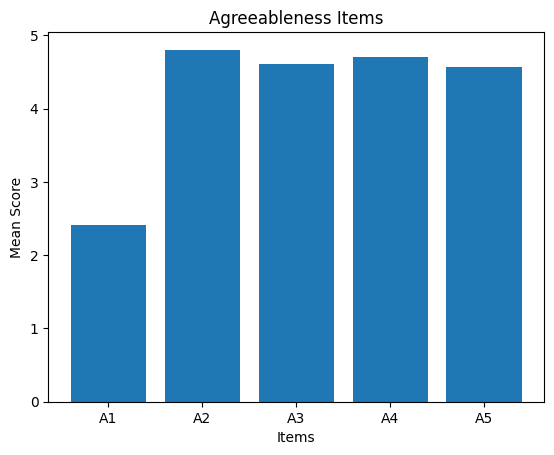

In [ ]:
# Importing matplotlib library
# 'plt' is a commonly used alias for 'pyplot' in Matplotlib
import matplotlib.pyplot as plt

# Items related to Agreeableness
# This list contains the codes for five items related to the Agreeableness trait
agreeableness_items = ['A1', 'A2', 'A3', 'A4', 'A5']

# Mean scores for each item
# Using a list comprehension to calculate the mean score for each item in the 'agreeableness_items' list
# 'bfi_df' is the DataFrame containing the data, and 'item' refers to each code in 'agreeableness_items'
mean_scores = [bfi_df[item].mean() for item in agreeableness_items]

# Creating a simple bar chart
# 'plt.bar()' creates a bar chart with the x-values as 'agreeableness_items' and y-values as 'mean_scores'
plt.bar(agreeableness_items, mean_scores)

# Adding labels to the x and y axes
# 'plt.xlabel()' adds a label to the x-axis, and 'plt.ylabel()' adds a label to the y-axis
plt.xlabel('Items')
plt.ylabel('Mean Score')

# Adding a title to the plot
# 'plt.title()' adds a title to the plot to provide context
plt.title('Agreeableness Items')

# Displaying the plot
# 'plt.show()' renders the plot and displays it to the user
plt.show()



Here is the simple bar chart showing the mean scores for the Agreeableness items (A1 to A5). While this chart provides a basic visualization, we can make several improvements to enhance its readability and informativeness.

### Improving the Bar Chart with Matplotlib Options

Here's how we can improve the bar chart:

1.  *Add Descriptive Labels:* Instead of using item codes (A1, A2, etc.), we can use descriptive labels for the x-axis to provide context.
2.  *Add a Horizontal Grid:* This will help readers easily compare the height of the bars.
3.  *Color Code the Bars:* Using different colors for positively and negatively keyed items will provide additional insights.
4.  *Rotate x-axis Labels:* Rotating the labels can prevent overlapping and make them more readable.

Here is the code for the improved bar chart:

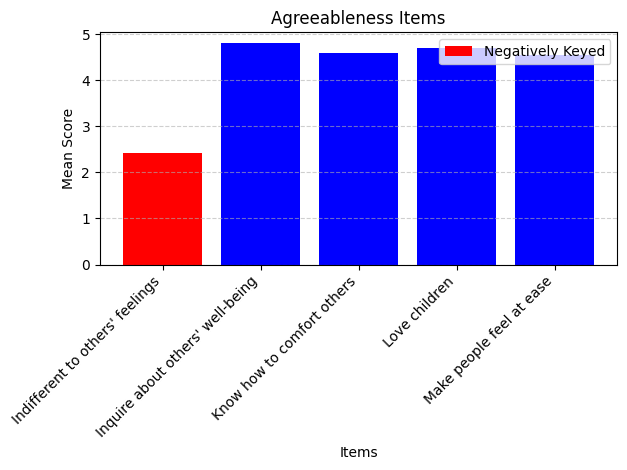

In [ ]:
# Descriptive labels for the x-axis
# A list of human-readable descriptions for each Agreeableness item
labels = [
    "Indifferent to others' feelings",
    "Inquire about others' well-being",
    "Know how to comfort others",
    "Love children",
    "Make people feel at ease"
]

# Keying for Agreeableness items
# A dictionary that maps each Agreeableness item to its keying value (-1 or 1)
keying_agreeableness = {
    'A1': -1,
    'A2': 1,
    'A3': 1,
    'A4': 1,
    'A5': 1
}

# Colors for positively and negatively keyed items
# List comprehension with a conditional expression to assign colors based on keying
# 'red' for negatively keyed items and 'blue' for positively keyed items
colors = ['red' if keying_agreeableness[item] == -1 else 'blue' for item in agreeableness_items]

# Creating the improved bar chart
# Using the 'color' parameter to assign colors to the bars and 'tick_label' to use descriptive labels
plt.bar(agreeableness_items, mean_scores, color=colors, tick_label=labels)

# Adding labels and title (as before)
plt.xlabel('Items')
plt.ylabel('Mean Score')
plt.title('Agreeableness Items')

# Rotating x-axis labels
# 'plt.xticks()' rotates the x-axis labels by 45 degrees to avoid overlap and ensure readability
plt.xticks(rotation=45, ha='right')

# Adding a horizontal grid
# 'plt.grid()' adds grid lines to the plot; 'axis='y'' means horizontal lines, 'linestyle='--'' sets dashed lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding a legend
# 'plt.legend()' adds a legend to the plot to explain the color coding
plt.legend(['Negatively Keyed', 'Positively Keyed'], loc='upper right')

# Adjusting layout
# 'plt.tight_layout()' automatically adjusts the plot's layout to fit all elements without overlap
plt.tight_layout()

# Displaying the plot (as before)
plt.show()


## Exercise: Create a Bar Chart
For this exercise, I'd like you to create a bar chart for the **Conscietiousness** items based on the template provide above. Here's what you will do:

1.  Determine the codes and keying for the Conscientiousness items (C1 to C5).
2.  Write human-readable descriptions for each Conscientiousness item to be used as x-axis labels.
3.  Compute the mean scores for the Conscientiousness items using the provided DataFrame.
4.  Use the keying values to assign appropriate colors to the bars. USe different colors than red and blue.
5.  Utilize Matplotlib to create an enhanced bar chart with labels, colors, grid lines, and other customizations.
6.  Display the final plot and analyze the visual representation of the Conscientiousness items.

I've provided a template code block to get you started.

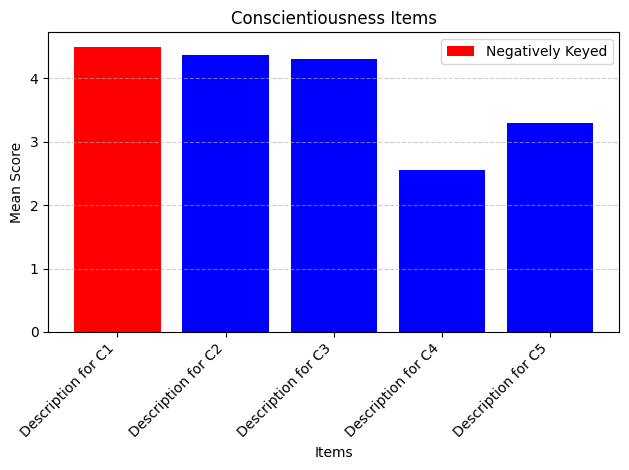

In [ ]:
# Descriptive labels for the x-axis
# TODO: Replace these with the correct descriptions for the Conscientiousness items
labels = [
    "Description for C1",
    "Description for C2",
    "Description for C3",
    "Description for C4",
    "Description for C5"
]

# Keying for Conscientiousness items
# TODO: Replace these with the correct keying for the Conscientiousness items
# Should be 1 or -1
keying_conscientiousness = {
    'C1': 0,
    'C2': 0,
    'C3': 0,
    'C4': 0,
    'C5': 0
}

# Items related to Conscientiousness
# TODO: Replace these with the correct codes for the Conscientiousness items (C1 to C5)
conscientiousness_items = ['A1', 'A2', 'A3', 'A4', 'A5']

# Mean scores for each item
mean_scores = [bfi_df[item].mean() for item in conscientiousness_items]

# Colors for positively and negatively keyed items. Change the colors from 'red' and `blue`
colors = ['red' if keying_conscientiousness[item] == -1 else 'blue' for item in conscientiousness_items]

# Creating the improved bar chart
plt.bar(conscientiousness_items, mean_scores, color=colors, tick_label=labels)
plt.xlabel('Items')
plt.ylabel('Mean Score')
plt.title('Conscientiousness Items')  # TODO: Modify the title
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Negatively Keyed', 'Positively Keyed'], loc='upper right')
plt.tight_layout()
plt.show()


### Line Charts

Line charts are commonly used to visualize trends, relationships, or changes over time. In this section, we'll explore how to create a simple line chart for seeing how age and being "quick to anger" relate to one another.

### Preliminaries: Creating a Table
First, we will create table to analyze and visualize the average tendency of individuals to get angered easily (represented by the 'N1' scores) across different age groups, specifically by decades. This kind of analysis is valuable for understanding how this trait varies with age and can provide insights into patterns of anger proneness. It will also help us set up our line graph (which we will create in the next section). Some benefits:

1. The table allows us to compare the average N1 scores of individuals within the same decade, making it easier to identify trends or differences in anger proneness as people age.

2.  Grouping data by decade condenses a large dataset into more manageable segments. This simplification aids in interpreting trends and patterns over time.

3.  The table's structure highlights whether there are any noticeable trends in anger proneness that correspond to specific age groups, which can be valuable for both research and practical applications.

Now, let's explore how this table is constructed in a little more detail:

1.  *Creating the 'decade' Column.* To categorize individuals by decade, a new column named 'decade' is added to the 'bfi_df' DataFrame. This column represents the decade of each individual's age. The calculation is achieved through integer division ('//') of the 'age' column by 10, followed by multiplying the result by 10 to round down to the nearest decade.

2.  *Grouping and Calculating the Mean N1 Scores.* The 'groupby' method is employed to group the data within 'bfi_df' by the 'decade' column. This groups individuals into categories based on their age in decades. Next, the 'mean()' function is applied to the 'N1' column within each age group to calculate the average anger proneness score for that particular decade.

3.  *Resetting the Index.* After calculating the mean N1 scores for each decade, 'reset_index()' is used to convert the result into a structured DataFrame format. This step ensures that the 'decade' column becomes part of the DataFrame, making it ready for presentation and further analysis.

Finally, we display the table of average N1 scores by decade. This table succinctly summarizes the data and provides a clear overview of how anger proneness tends to change across different age groups.

In [ ]:
# Creating a new column 'decade' to represent the decade of each individual's age
# We use integer division (//) to divide the age by 10 and then multiply by 10 to round down to the nearest decade
bfi_df['decade'] = (bfi_df['age'] // 10) * 10

# Grouping the data by the 'decade' column and calculating the mean N1 score for each decade
# The 'groupby' method groups the data, and the 'mean()' function calculates the average for the N1 column
# 'reset_index()' converts the result into a DataFrame format
average_N1_by_decade = bfi_df.groupby('decade')['N1'].mean().reset_index()

# Displaying the table of average N1 scores by decade
# This table provides a clear summary of the average tendency to get angered easily for each age group (decade)
average_N1_by_decade



,decade,N1
0,0,5.000000
1,10,3.063291
2,20,2.955236
3,30,2.968635
4,40,2.779264
5,50,2.517647
6,60,2.416667
7,70,2.333333
8,80,1.000000


### A Simple Line Graph
A line graph is an excellent tool to visualize the relationship between age (grouped by decades) and the average tendency to get angered easily (N1 score).

Let's start by creating a very simple line graph based on the table we generated in the previous section. Our goal is to visually depict how the average tendency to get angry easily (measured by 'N1' scores) changes across different age groups, specifically by decades. By plotting this relationship, it becomes easier to observe any trends or patterns in anger proneness with advancing age. Here's the plan:

1. The code starts by extracting two sets of data:

    -   'decades': This represents the decades of age from the 'average_N1_by_decade' DataFrame.
    -   'average_N1_scores': This contains the corresponding average 'N1' scores for each age group.
2.  Using 'plt.plot()', a simple line graph is generated. The x-axis ('Decade of Age') is populated with 'decades,' and the y-axis ('Average N1 Score (Get Angry Easily)') is populated with 'average_N1_scores.' This line graph visually represents how the average anger proneness varies with age.

3.  To provide context and clarity, labels are added to both axes. 'plt.xlabel()' assigns 'Decade of Age' as the label for the x-axis, and 'plt.ylabel()' assigns 'Average N1 Score (Get Angry Easily)' as the label for the y-axis.

4.  A title is included in the plot using 'plt.title(),' which provides an overarching description of the graph as 'Relationship Between Age and Getting Angry Easily.'

5. Finally, 'plt.show()' is used to render and display the line graph to the viewer.

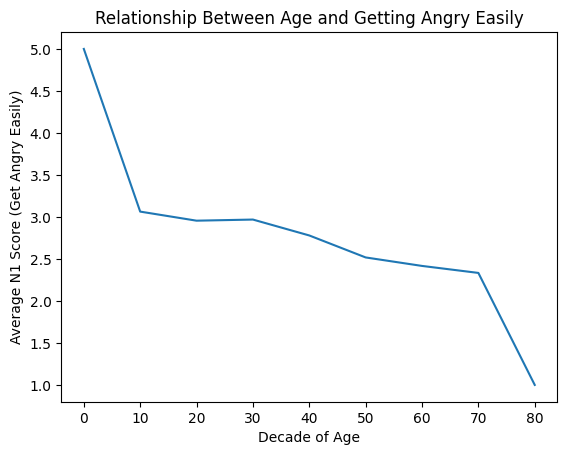

In [ ]:
# Extracting decades and average N1 scores
decades = average_N1_by_decade['decade']
average_N1_scores = average_N1_by_decade['N1']

# Creating a simple line graph
plt.plot(decades, average_N1_scores)

# Adding labels to the axes
plt.xlabel('Decade of Age')
plt.ylabel('Average N1 Score (Get Angry Easily)')

# Adding a title
plt.title('Relationship Between Age and Getting Angry Easily')

# Displaying the plot
plt.show()


### Improving Our Line Graph
This visualization builds upon the previous one, introducing changes and additions to visualize the relationship between age and the tendency to get angry easily while considering gender as a factor. We're doing this for a few reasons:

1.  By grouping the data by both 'decade' and 'gender,' we acknowledge that gender can play a significant role in how individuals express anger proneness. This modification allows us to explore whether there are gender-specific patterns in anger proneness across different age groups.

2.  Plotting separate lines for men and women provides a more nuanced understanding of how anger proneness changes with age for each gender. It enables us to observe potential divergences or similarities in trends.

3. Adding a legend is essential because it clarifies which line represents men and which represents women. This ensures that viewers can easily interpret the graph.

And here's how we are going to do this:

1.   The code begins by grouping the data in 'bfi_df' by both 'decade' and 'gender' and then calculating the mean 'N1' score for each group. This results in the 'average_N1_by_decade_gender' DataFrame, which includes average scores for each combination of age decade and gender.

2. Two separate DataFrames are created to extract data for men ('men_data') and women ('women_data'). This is achieved by filtering 'average_N1_by_decade_gender' based on gender values (1 for men, 2 for women).

3. Two lines are plotted on the graph using 'plt.plot()': one for men ('Men' label, blue) and one for women ('Women' label, red). This visually distinguishes the trends for each gender.

4.  Labels for the x-axis ('Decade of Age'), y-axis ('Average N1 Score (Get Angry Easily)'), and the graph's title ('Relationship Between Age and Getting Angry Easily by Gender') are added to provide context.

5.  'plt.legend()' adds a legend to the plot, which explains the meaning of the different colored lines (men and women). This aids in interpretation.

Finally, 'plt.show()' is used to display the modified graph with separate lines for men and women, enabling viewers to analyze gender-specific trends in anger proneness across age groups.

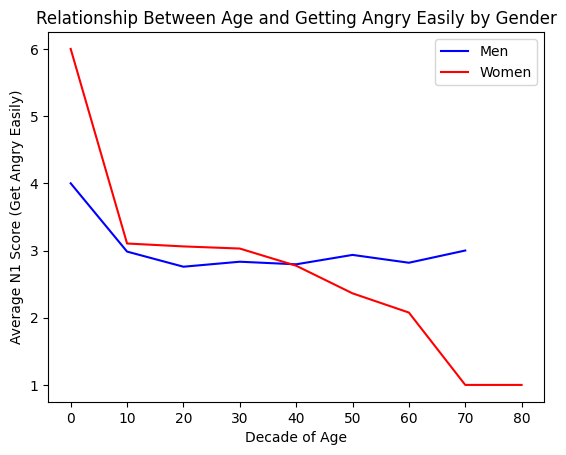

In [ ]:
# Grouping by 'decade' and 'gender', and calculating the mean N1 score for each group
average_N1_by_decade_gender = bfi_df.groupby(['decade', 'gender'])['N1'].mean().reset_index()

# Extracting data for men (gender = 1) and women (gender = 2)
men_data = average_N1_by_decade_gender[average_N1_by_decade_gender['gender'] == 1]
women_data = average_N1_by_decade_gender[average_N1_by_decade_gender['gender'] == 2]

# Plotting line for men
plt.plot(men_data['decade'], men_data['N1'], label='Men', color='blue')

# Plotting line for women
plt.plot(women_data['decade'], women_data['N1'], label='Women', color='red')

# Adding labels, title, and legend
plt.xlabel('Decade of Age')
plt.ylabel('Average N1 Score (Get Angry Easily)')
plt.title('Relationship Between Age and Getting Angry Easily by Gender')
plt.legend()  # Adding a legend to differentiate lines for men and women

# Displaying the plot
plt.show()


## Exercise: Analyzing the Relationship Between Age, Gender, and "Love Children" Trait

Objective: Create a table and a line graph to explore how the tendency to "Love children" ('A4') varies across different age groups and between genders. (NOTE: You should be able to use a lot of the code provided above to help you with this!)

Here's what you will need to do:
1. Start by importing the necessary libraries:
2. Load your dataset into a DataFrame. Make sure it contains columns for 'age,' 'gender,' and 'A4' (the "Love children" trait).
3.  In this step, create a new column 'decade' in your DataFrame to represent the decade of each individual's age. You can use integer division (`//`) to divide the age by 10 and then multiply by 10 to round down to the nearest decade.
4.  Group the data in your DataFrame by both 'decade' and 'gender.' Calculate the mean 'A4' score for each group. Store this in a new DataFrame.
5. Create separate DataFrames for men and women by filtering the 'gender' column in your grouped DataFrame. Use 'gender = 1' for men and 'gender = 2' for women.
6. Using the extracted DataFrames for men and women, create a line graph with 'decade' on the x-axis and the mean 'A4' scores on the y-axis. Plot two lines on the same graph, one for men and one for women. Use different colors (e.g., blue for men and red for women) and provide labels ('Men' and 'Women') for the lines.
7. e Label the x-axis as 'Decade of Age,' the y-axis as 'Average A4 Score (Love Children),' and give the graph an appropriate title like 'Relationship Between Age, Gender, and Love for Children.'
8. Use 'plt.show()' to display the line graph, which will show how the tendency to "Love children" varies by age and gender.
9. Challenge (Optional): Extend the exercise by exploring other personality traits or factors and visualizing how they relate to age and gender in your dataset.

Remember that data analysis is an iterative process, and you may need to adjust and refine your code as you explore the data. Good luck with your analysis!

In [ ]:
# My analysis

In [ ]:
# My analysis

In [ ]:
# My analysis

## Code to Know
| Code Segment | English Description |
| --- | --- |
| `plt.bar(agreeableness_items, mean_scores)` | Matplotlib code to create a bar chart with items on the x-axis and mean scores on the y-axis, using the variables `agreeableness_items` for the items and `mean_scores` for the mean scores. |
| `plt.xlabel('Items')` | Matplotlib code to label the x-axis as "Items". |
| `plt.ylabel('Mean Score')` | Matplotlib code to label the y-axis as "Mean Score". |
| `plt.title('Agreeableness Items')` | Matplotlib code to set the chart title to "Agreeableness Items". |
| `agreeableness_items = ['A1', 'A2', 'A3', 'A4', 'A5']` | Python code to define a list of agreeableness items with the labels 'A1' to 'A5', stored in the variable `agreeableness_items`. |
| `mean_scores = [bfi_df[item].mean() for item in agreeableness_items]` | Python code to calculate the mean scores of the agreeableness items in the DataFrame `bfi_df` and store them in the variable `mean_scores`. |
| `plt.show()` | Matplotlib code to display the plotted chart. |
| `plt.bar(agreeableness_items, mean_scores, color=my_colors, tick_label=my_labels)` | Matplotlib code to create a bar chart with customized colors and tick labels, using the variables `my_colors` for the colors and `my_labels` for the tick labels. |
| `plt.xticks(rotation=45, ha='right')` | Matplotlib code to rotate the x-axis tick labels by 45 degrees and align them to the right. |
| `plt.grid(axis='y', linestyle='--', alpha=0.6)` | Matplotlib code to add a grid to the y-axis with dashed lines and an opacity of 0.6. |
| `plt.legend(['Cat1', 'Cat2'], loc='upper right')` | Matplotlib code to add a legend in the upper right corner, with categories labeled 'Cat1' and 'Cat2'. |
| `plt.tight_layout()` | Matplotlib code to adjust the layout so that all elements fit within the figure area. |
| `bfi_df['decade'] = (bfi_df['age'] // 10) * 10` | Python code to create a new column `decade` in `bfi_df` by rounding down the `age` column to the nearest decade. |
| `bfi_df.groupby('decade')['N1'].mean().reset_index()` | Python code to group the DataFrame `bfi_df` by the `decade` column, calculate the mean of the 'N1' column within each decade, and reset the index of the resulting DataFrame. |

## Case Study: Psychology's "Replication Crisis"
(see: https://en.wikipedia.org/wiki/Replication_crisis for an overview and links to relevant research).

We like to think that science gives us solid answers, but what happens when those answers start to crumble? Welcome to the **Replication Crisis**, a shake-up that's been rocking the world of psychology and other scientific fields. Imagine you're a scientist who's just spent years on a study about, say, the impact of body language on self-esteem. You publish it, and it's a hit. But then other researchers try to do the same experiment and get completely different results. Awkward, right?

This isn't just a "one-off" issue. Psychology has been in the hot seat for a while now, especially areas like social psychology, clinical psychology, and educational research. Brian Nosek coordinated something called The Reproducibility Project: Psychology, where researchers took a second look at 100 published studies. Guess what? Only about a third of them stood up to a second test. Cognitive psychology had a bit of a better track record than social psychology, but the numbers still weren't great.

Then there's a 2018 study in Nature Human Behaviour that tried to replicate some high-profile social and behavioral science papers. The success rate? About 62%. Another big project by the Center for Open Science found that half of the 28 classic studies they tested didn't hold up. And it's not just older studies; recent brain research has also come into question. A 2022 study suggests that many brain-phenotype studies might have been jumping the gun, with their findings not holding up in larger samples.

So, what's going on here? Are these just flukes, or is there something fundamentally wrong with how we're conducting and reviewing scientific research? The Replication Crisis has opened up a can of worms, and it's making us rethink everything we thought we knew.

### What Is the Significance of Controlled Experiments in Science?

Controlled experiments are the backbone of scientific research. They're like the lab version of a recipe, meticulously designed so that anyone, anywhere, can repeat the experiment and get the same results---or at least, that's the idea. In a controlled experiment, researchers manipulate one variable (the independent variable) and measure its impact on another (the dependent variable), all while keeping all other conditions constant. This setup allows scientists to pinpoint cause-and-effect relationships, making it a linchpin for scientific validation.

But here's where it gets tricky. Even an experiment that seems perfectly designed can run into problems. Take the famed Stanford Prison Experiment, led by psychologist Philip Zimbardo in the 1970s. This study looked at the psychological effects of becoming a prisoner or prison guard. It was incredibly well-controlled, but when others tried to repeat it, they couldn't get the same results. And that's not even diving into the ethical issues the experiment raised, like emotional trauma to the participants.

So why did the Stanford Prison Experiment, with its tight controls, become an emblem of the Replication Crisis? The devil is in the details. In psychology, and in many other fields, human behavior is so complex that it's challenging to account for all the variables that might affect the outcome. Even the mood of a participant on the day of the experiment could throw off the results. And let's not forget that the publication process often favors "sexy" results, making less eye-catching but more reliable studies less likely to see the light of day.

The Replication Crisis shows us that controlled experiments are necessary but not sufficient for robust scientific knowledge. They're a starting point, but they don't offer a free pass to unquestioned credibility. As the scrutiny on the Stanford Prison Experiment illustrates, even the most rigorously controlled studies are not immune to questions of replicability and ethical considerations.

### How Does Peer Review Serve and Fail the Scientific Community?

Peer review is the academic world's version of a quality check. Before research sees the light of day, it undergoes scrutiny by experts in the field. These peers aim to weed out errors, evaluate methodologies, and ensure that conclusions are supported by data. When a study passes peer review and gets published, it's like receiving a seal of approval. It says, "This work has met the standards of the scientific community."

But don't mistake peer review for an impenetrable fortress of rigor. Sometimes things slip through the cracks. For instance, the theory of Multiple Intelligences, proposed by Howard Gardner, garnered much attention and was subject to peer review. Despite its wide influence on educational practices, the empirical support for multiple types of intelligences separate from general intelligence remains tepid at best. Similarly, Implicit Bias Training programs have often been rolled out in corporate and institutional settings, based on peer-reviewed studies. Yet, the efficacy of these programs in reducing bias and improving organizational culture is hotly debated, with evidence showing mixed results.

Why do such problematic studies get through? One culprit is **publication bias**, the tendency for academic journals to favor studies with dramatic results. Imagine you're a journal editor and you've got one study showing that Implicit Bias Training works and another saying it doesn't. Which one would you pick? Probably the one with the eye-catching positive result, right? This bias can distort the scientific record, emphasizing flashy but potentially flawed studies over more mundane, robust findings.

Another issue is that peer review is, at its core, a human endeavor, fraught with all the biases and limitations that come with that. Reviewers may have conflicts of interest, ideological stances, or simple human error that can cloud their judgment. Plus, peer review often stops once a study is published, while real-world applications of that research continue to evolve and proliferate, sometimes revealing shortcomings that were not apparent during the initial review.

So, while peer review serves as a critical filter, it's far from foolproof. Studies with problematic methodologies or contested findings can and do make their way through the system, often with wide-reaching impact. As the Replication Crisis unfolds, it's becoming increasingly clear that peer review is a necessary, but not always sufficient, condition for scientific integrity

### What Role Do p-values Play in This Crisis?

In the realm of scientific research, p-values act as a gauge to indicate the probability that the results of an experiment happened by mere chance. Specifically, a **p-value** less than 0.05 is often considered the golden threshold that suggests your results are **statistically significant.** Cross that line, and you're more likely to get published, earn funding, and make headlines. It sounds straightforward, but herein lies a seductive pitfall that has contributed substantially to the Replication Crisis.

Let's talk about Ego Depletion, the idea that self-control or willpower is a limited resource that can be used up. Researchers used p-values to declare strong evidence supporting this theory. However, later attempts to replicate these studies have found less persuasive data, casting doubt on the original findings. What went wrong? In a rush to attain that magical p-value, researchers sometimes engage in what's called "p-hacking," essentially cherry-picking or manipulating data until they get a result that reaches statistical significance. The focus shifts from truth-seeking to p-value hunting.

Or consider Emotional Intelligence, a concept suggesting that the ability to manage and use emotions effectively is a type of intelligence that can be measured and developed. Numerous studies have reported statistically significant p-values supporting the utility of Emotional Intelligence in various sectors like management, health, and education. However, the overreliance on p-values has masked ongoing debates about how robust these findings are, with some critics arguing that the concept is too broad and poorly defined to be reliably measured (especially with respect to famous ideas such as "Marshmallow Test" for children, or the idea of "Grit.").

The misuse or overreliance on p-values has a domino effect. Not only does it produce studies that are less likely to be replicated, but it also affects meta-analyses where researchers compile multiple studies to get a 'big picture' view of a field. If those individual studies are shaky, the meta-analysis will be too, perpetuating a cycle of unreliable science.

In summary, p-values are a useful tool, but they're not a silver bullet. When used as the end-all, be-all proof of an experiment's validity, they can contribute to the spread of non-replicable findings that undermine the credibility of science itself. The Replication Crisis has exposed this weakness in the system, forcing a reevaluation of how we quantify and qualify scientific success..

### Why Are Some Areas of Science (and Psychology) Less Affected?

The replication crisis isn't uniformly distributed; it's more like a hailstorm that damages some roofs more than others. Let's look at why certain areas are holding up better under scrutiny.

Starting with Personality Psychology, notably the Big Five personality traits (Openness, Conscientiousness, Extroversion, Agreeableness, and Neuroticism), the resilience here partly stems from a reliance on well-validated, standardized tests like the NEO PI-R. Coupled with longitudinal data---tracking the same variables across extended periods---these methods add layers of reliability.

Contrast this with theories like Learning Styles, which haven't withstood scientific scrutiny. They suffer from shaky methodologies and weak statistical analyses. Similarly, theories about people being Left-Brained or Right-Brained have been debunked by neuroscientists. In essence, these theories crumble because they were built on weaker foundations---more reliant on anecdote than empirical analysis.

Now, if you're thinking that hard sciences like physics are immune to the replication crisis, you'd be partially correct. These fields usually involve less human complexity and yield more definitive answers. But let's address the elephant in the room: Medicine. While one might assume the stakes of life and death would necessitate rigorous scientific practices, medicine is not without its own replication issues. Subfields in medicine, especially those concerning drug efficacy and treatment protocols, have faced challenges in reproducibility. Overestimation of effectiveness and underestimation of side effects are common pitfalls. Mechanisms like evidence-based medicine and the Cochrane review have been employed as corrective measures, but challenges remain. The issue is not uniform; areas such as surgical practices have seen less of this crisis compared to, say, psychiatric medications.

In sum, the resilience or vulnerability of a field to the replication crisis can be traced back to the complexity of its subject matter, the rigor of its methodologies, and the empirical strength of its theories. In both science and medicine, the degree to which a field is affected by the replication crisis serves as a barometer for how much trust we can invest in its findings.

### What Are the Proposed Remedies for the Crisis?

Tackling the replication crisis is akin to addressing structural weaknesses in a building: you could patch up cracks as they appear, or you could address the underlying issues. Let's look at some of the more transformative repairs being proposed.

- *Changing Academic Incentives.* Right now, there's an undue focus on groundbreaking results, often at the expense of rigor. Altering academic incentives to value methodology equally with outcomes could be a game-changer. This means promotion and tenure committees, as well as funding bodies, should recognize the merit of replication studies and methodological rigor.

- *Open Science Practices.* Transparency is key. Researchers can share data sets, statistical code, and detailed methodologies openly. This not only allows other scientists to check their work but also aids in the replication of studies. Various platforms like the Open Science Framework facilitate this kind of sharing.

- *Pre-registration* Researchers can **pre-register** their hypotheses, methodologies, and statistical analyses in advance. This serves to curb **p-hacking** (manipulating data until you get a significant p-value) and other questionable research practices. Pre-registration becomes a commitment to a game plan that's publicly visible, offering a layer of accountability.

- *Improving Statistical Literacy:* A better understanding of statistics, especially concerning p-values and effect sizes, will allow both researchers and reviewers to make more informed judgments about the quality of research. It'll also help in weeding out studies that might be over or underestimating effects.

These solutions aren't exclusive; a multi-pronged approach is likely the most effective way to reinforce the structure of science and ensure it can withstand scrutiny. While the crisis is an uncomfortable revelation, it also provides an impetus for broad reform---a silver lining in an otherwise troubling situation.

## Questions: The Replication Crisis
Discussion Questions
1. Given that problematic studies like those on Multiple Intelligences and Implicit Bias Training can pass through the peer-review process, what additional safeguards could be put in place to catch these errors before publication? Could automation or machine learning offer solutions, or would they introduce new kinds of biases?

2. Why do you think some areas of psychology, like personality traits, seem less affected by the replication crisis compared to others? Could the methodologies used in these areas serve as a model for more problematic fields like social psychology or medical research?

3. Academic structures often reward novelty and high-impact publications, potentially at the cost of rigorous, replicable research. How can academic institutions reform their reward systems to encourage ethical and robust scientific practices without stifling innovation? Is it possible to strike a balance?

### My Answers: Replication Crisis
1.

2.

3.

## Review With Quizlet
Run the following cell to launch the quizlet deck for this chapter.

In [ ]:
%%html
<iframe src="https://quizlet.com/838976577/learn/embed?i=psvlh&x=1jj1" height="500" width="100%" style="border:0"></iframe>

## Glossary

| Term | Definition |
| --- | --- |
| Data Dictionary | A document or structure that describes the types, structures, and meanings of data fields within a dataset. |
| Big Five Model | A psychological framework for describing human personality based on five core traits: openness, conscientiousness, extraversion, agreeableness, and neuroticism. |
| Replication Crisis | A methodological crisis primarily affecting the social sciences, characterized by the inability to replicate or reproduce a significant proportion of published research. |
| Controlled Experiment | A scientific test in which variables are deliberately manipulated to observe the effect on a dependent variable, while other factors are held constant. |
| Replication | The act of independently performing a scientific experiment to confirm the results obtained by a previous study. |
| Ego Depletion | A psychological theory positing that willpower or self-control is a finite resource that can be exhausted, but has faced challenges in being reliably replicated. |
| P-value | A metric that quantifies the likelihood that observed data would occur if the null hypothesis were true. |
| Statistical Significance | The condition in which a result is unlikely to have occurred by random chance, often determined by a p-value threshold such as 0.05. |
| P-hacking | The manipulation of data or statistical analyses to achieve a desired p-value, often leading to false or misleading conclusions. |
| Pre-registration | The practice of publicly declaring key aspects of a research study, such as hypotheses and methodologies, before the study is conducted. |